In [ ]:
!nvidia-smi

Mon Jun 17 12:42:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!git clone https://github.com/cbtn-data-science-ml/ml_datasets.git

Cloning into 'ml_datasets'...
remote: Enumerating objects: 38084, done.
remote: Counting objects: 100% (13080/13080), done.
remote: Compressing objects: 100% (13075/13075), done.
remote: Total 38084 (delta 8), reused 13064 (delta 0), pack-reused 25004
Receiving objects: 100% (38084/38084), 1.14 GiB | 24.38 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (39805/39805), done.


In [ ]:
%pwd

'/content'

In [ ]:
import os
os.chdir('ml_datasets')

In [ ]:
%pwd

'/content/ml_datasets'

In [ ]:
%ls

cats_vs_dogs/  model_utils.py  README.md         waffles_or_nachos/
food_10/       ramen_sushi/    reduced_dataset/


In [ ]:
import random
import shutil
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

dataset_path = '/content/ml_datasets/food_10/train'


reduced_dataset_path = '/content/drive/MyDrive/reduced_dataset'

os.makedirs(reduced_dataset_path, exist_ok=True)

reduction = 0.01

for item in os.listdir(dataset_path):
  class_path = os.path.join(dataset_path, item)

  if os.path.isdir(class_path):
    reduced_class_path = os.path.join(reduced_dataset_path, item)
    os.makedirs(reduced_class_path, exist_ok=True)
    images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    reduced_size = int(len(images) * reduction)

    selected_images = random.sample(images, reduced_size)
    for image in selected_images:
      shutil.copy(os.path.join(class_path, image), os.path.join(reduced_class_path, image))

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
train_dir = '/content/drive/MyDrive/reduced_dataset'
test_dir = 'food_10/test'

train_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 80 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
!wget https://raw.githubusercontent.com/cbtn-data-science-ml/ml_datasets/main/model_utils.py

--2024-06-17 13:13:57--  https://raw.githubusercontent.com/cbtn-data-science-ml/ml_datasets/main/model_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2299 (2.2K) [text/plain]
Saving to: ‘model_utils.py.1’

model_utils.py.1    100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-06-17 13:13:57 (53.0 MB/s) - ‘model_utils.py.1’ saved [2299/2299]



# CHALLENGE #1

In [ ]:
from model_utils import create_model_from_kaggle_tfhub, plot_loss_and_accuracy, MyCallback, early_stopping_callback, model_checkpoint_callback

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Create base_model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=IMAGE_SIZE + (3,)) #(224, 224, 3)
base_model.trainable = False # Freeze base_model

# Create model architechture
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator,
                    callbacks=early_stopping_callback)

94765736/94765736 [==============================] - 3s 0us/step
Epoch 1/10
3/3 [==============================] - 17s 5s/step - loss: 3.0127 - accuracy: 0.0625 - val_loss: 2.4269 - val_accuracy: 0.1175
Epoch 2/10
3/3 [==============================] - 6s 3s/step - loss: 2.6815 - accuracy: 0.1625 - val_loss: 2.3559 - val_accuracy: 0.1040
Epoch 3/10
3/3 [==============================] - 6s 3s/step - loss: 2.5656 - accuracy: 0.0750 - val_loss: 2.3161 - val_accuracy: 0.1050
Epoch 4/10
3/3 [==============================] - 7s 3s/step - loss: 2.5387 - accuracy: 0.0625 - val_loss: 2.3032 - val_accuracy: 0.1080
Epoch 5/10
3/3 [==============================] - 7s 3s/step - loss: 2.3382 - accuracy: 0.1375 - val_loss: 2.3062 - val_accuracy: 0.1120
Epoch 6/10
3/3 [==============================] - 7s 3s/step - loss: 2.4350 - accuracy: 0.0875 - val_loss: 2.2979 - val_accuracy: 0.1410
Epoch 7/10
3/3 [==============================] - 7s 3s/step - loss: 2.4079 - accuracy: 0.0625 - val_loss: 2.288

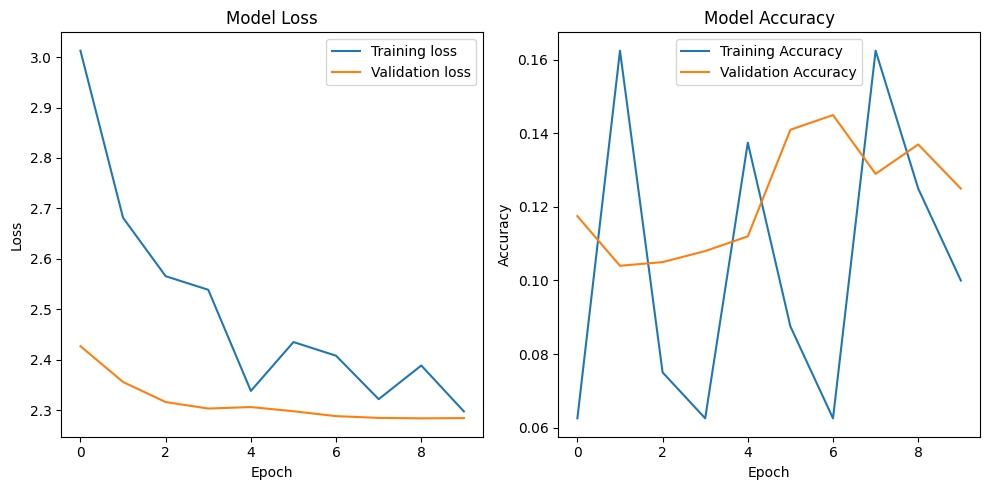

In [ ]:
plot_loss_and_accuracy(history)

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
# Begin Fine-Tuning
base_model.trainable = True
fine_tune_at = len(base_model.layers) -10

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

# Recompile for fine-tuning
model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [ ]:
print(len(base_model.layers) )

175


In [ ]:
# Fine-Tuning
history_fine_tuning = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping_callback],
    verbose=1)

Epoch 1/10
3/3 [==============================] - 14s 4s/step - loss: 2.3096 - accuracy: 0.1125 - val_loss: 2.2881 - val_accuracy: 0.1300
Epoch 2/10
3/3 [==============================] - 7s 3s/step - loss: 2.1330 - accuracy: 0.2000 - val_loss: 2.2894 - val_accuracy: 0.1465
Epoch 3/10
3/3 [==============================] - 7s 3s/step - loss: 2.0144 - accuracy: 0.3250 - val_loss: 2.2855 - val_accuracy: 0.1440
Epoch 4/10
3/3 [==============================] - 7s 3s/step - loss: 1.9799 - accuracy: 0.3000 - val_loss: 2.2822 - val_accuracy: 0.1495
Epoch 5/10
3/3 [==============================] - 7s 4s/step - loss: 1.8720 - accuracy: 0.3500 - val_loss: 2.2800 - val_accuracy: 0.1490
Epoch 6/10
3/3 [==============================] - 7s 4s/step - loss: 1.7662 - accuracy: 0.5125 - val_loss: 2.2768 - val_accuracy: 0.1400
Epoch 7/10
3/3 [==============================] - 7s 4s/step - loss: 1.7253 - accuracy: 0.4625 - val_loss: 2.2754 - val_accuracy: 0.1345
Epoch 8/10
3/3 [========================

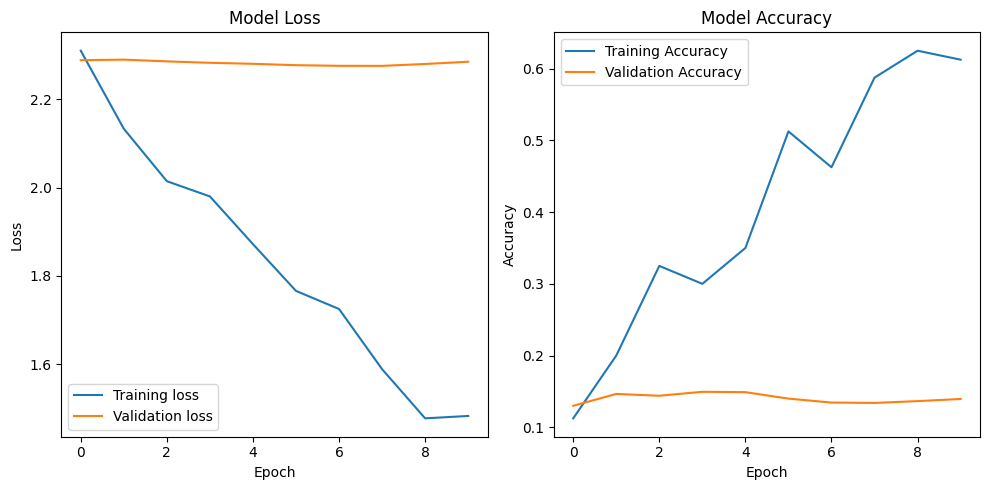

In [ ]:
plot_loss_and_accuracy(history_fine_tuning)